<a href="https://colab.research.google.com/github/Filszcz/ML/blob/main/pytorch_refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
import torch
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from torch import nn


In [374]:
%pip install torchmetrics

import torchmetrics
from torchmetrics.classification import BinaryAccuracy

In [375]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [376]:
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.2)

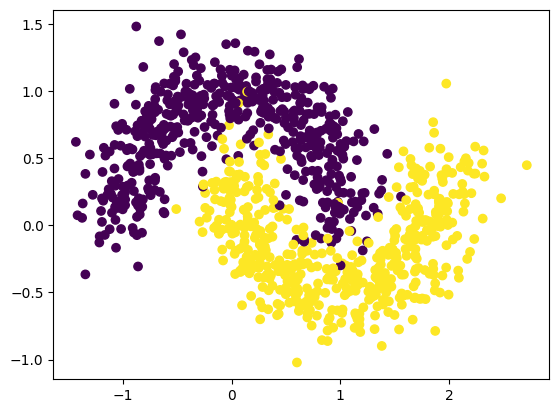

In [377]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis")

In [378]:
print(y[:10])

[0 0 0 0 0 0 1 0 1 0]


In [379]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

In [381]:
y_test.dtype

torch.float32

In [382]:
#hyper parameters
LR = 0.001
EPOCHS = 50
BATCH_SIZE = 32


In [383]:
class Medium_size(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=256)
    self.layer_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=256, out_features=128)
    self.layer_4 = nn.ReLU()
    self.layer_5 = nn.Linear(in_features=128, out_features=64)
    self.layer_6 = nn.ReLU()
    self.layer_7 = nn.Linear(in_features=64, out_features=1)


  def forward(self, x):
    #operator fusion

    return self.layer_7(self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))))


In [384]:
model_0 = Medium_size().to(device)

In [385]:
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=LR)
loss_fn = nn.BCEWithLogitsLoss()
acc_fn = BinaryAccuracy().to(device)

In [386]:
X_train.dtype

torch.float32

In [387]:
acc = "broken"
test_acc = "broken"

In [388]:
for epoch in range(EPOCHS):
  #forward pass
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  #logits -> pred prob -> pred label
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calcualte the loss and acc
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  #optim zero grad
  optimizer.zero_grad()

  #loss backwards
  loss.backward()

  #optim step
  optimizer.step()

  #test
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch:{epoch}, Loss:{loss:.5f}, Acc:{acc}, Test Loss{test_loss}, Test Acc:{test_acc}")








Epoch:0, Loss:0.69437, Acc:0.5400000214576721, Test Loss0.6754030585289001, Test Acc:0.699999988079071
Epoch:10, Loss:0.48695, Acc:0.808571457862854, Test Loss0.47704336047172546, Test Acc:0.8266666531562805
Epoch:20, Loss:0.30380, Acc:0.8628571629524231, Test Loss0.3027426600456238, Test Acc:0.8633333444595337
Epoch:30, Loss:0.24325, Acc:0.8928571343421936, Test Loss0.24382935464382172, Test Acc:0.8933333158493042
Epoch:40, Loss:0.20718, Acc:0.904285728931427, Test Loss0.20699898898601532, Test Acc:0.9066666960716248


helper_functions.py already exists, skipping download


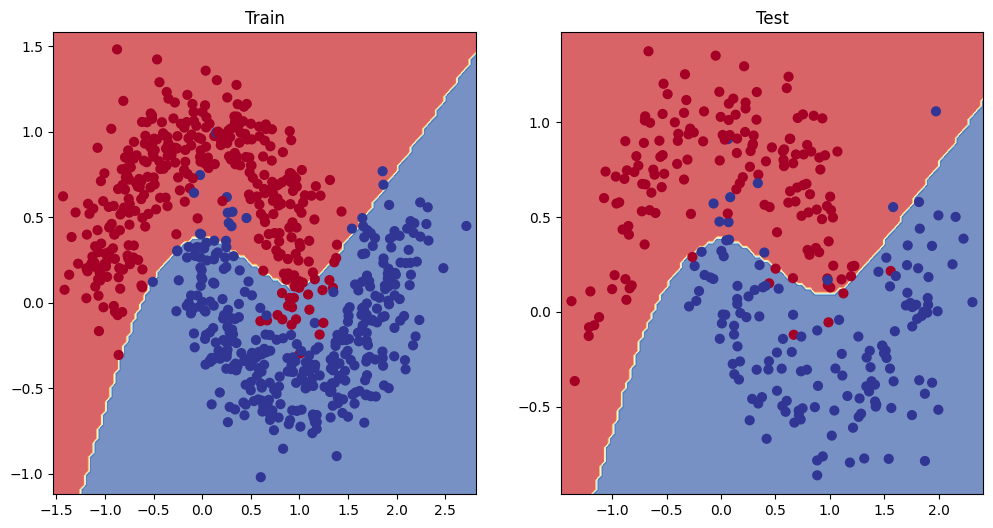

In [389]:
#  decision boundry graph code from Daniel Bourke tutorial
#  https://www.youtube.com/@mrdbourke

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


